In [17]:
import scanpy as sc
import anndata as ad
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
np.random.seed(66)

adata_orig = sc.read_10x_h5("E:/Projection-seq/UPB_Full/Barcode-1/outs/filtered_feature_bc_matrix.h5")
adata_orig.var_names_make_unique()
adata_orig.obs[["UPB1", "UPB2", "UPB4", "UPB6"]] = adata_orig[:, ["UPB1", "UPB2", "UPB4", "UPB6"]].X.toarray().astype(int).copy()
# orig_names = adata_orig.obs_names

# data_path = "E:/Projection-seq/UPB_Single/"

# UPBs = ["UPB1", "UPB2", "UPB4", "UPB6"]

# for upb in UPBs:
#     raw_path = data_path + upb + "_Barcode-1/Barcode-1" + "/outs/filtered_feature_bc_matrix.h5"
#     temp_adata_orig = sc.read_10x_h5(
#         raw_path,
#                               )
#     temp_adata_orig.var_names_make_unique()
#     x_names = []
#     for name in temp_adata_orig.obs_names:
#         if name in orig_names:
#             x_names.append(name)
#     temp_adata_orig = temp_adata_orig[x_names, :].copy()
#     adata_orig.obs.loc[temp_adata_orig.obs_names, upb] = temp_adata_orig[:, upb].X.toarray().astype(int).copy()

reading E:/Projection-seq/UPB_Full/Barcode-1/outs/filtered_feature_bc_matrix.h5


 (0:00:00)


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [18]:
genes = []
for g in adata_orig.var_names:
    if g not in ["UPB1", "UPB2", "UPB4", "UPB5", "UPB6", "UPB7"]:
        genes.append(g)
adata_orig = adata_orig[:, genes].copy()

In [19]:
adata_orig.obs["UPBs"] = ["None"] * adata_orig.shape[0]

upb_combos = ["1", "2", "4", "6", "1-2", "1-4", "1-6", "2-4", "2-6", "4-6", "1-2-4", "1-2-6", "2-4-6", "1-2-4-6"]

for combo in upb_combos:
    cols = ["UPB" + dg for dg in combo.split("-")]
    mask = np.sum(adata_orig.obs[cols] > 0, axis=1) == len(cols)
    adata_orig.obs.loc[mask, "UPBs"] = combo

In [20]:
adata_orig.obs["LM"] = np.sum(adata_orig.obs[["UPB1", "UPB4"]], axis=1) > 0
adata_orig.obs["RL"] = np.sum(adata_orig.obs[["UPB2", "UPB6"]], axis=1) > 0

In [21]:
adata_orig.obs["VISs"] = [None] * adata_orig.shape[0]

vis_combos = ["LM", "RL", "LM-RL"]

for combo in vis_combos:
    cols = combo.split("-")
    mask = np.sum(adata_orig.obs[cols] == True, axis=1) == len(cols)
    adata_orig.obs.loc[mask, "VISs"] = combo

In [22]:
sc.pp.filter_cells(adata_orig, min_genes=700)
sc.pp.filter_genes(adata_orig, min_cells=8)

filtered out 141 cells that have less than 700 genes expressed
filtered out 11168 genes that are detected in less than 8 cells


In [23]:
mito_genes = adata_orig.var_names.str.startswith('mt-')
adata_orig.obs['percent_mito'] = 100 * (np.sum(adata_orig[:, mito_genes].X, axis=1) / np.sum(adata_orig.X, axis=1))

In [24]:
adata_orig.obs["n_UMIs"] = np.sum(adata_orig.X, axis=1).astype(int)

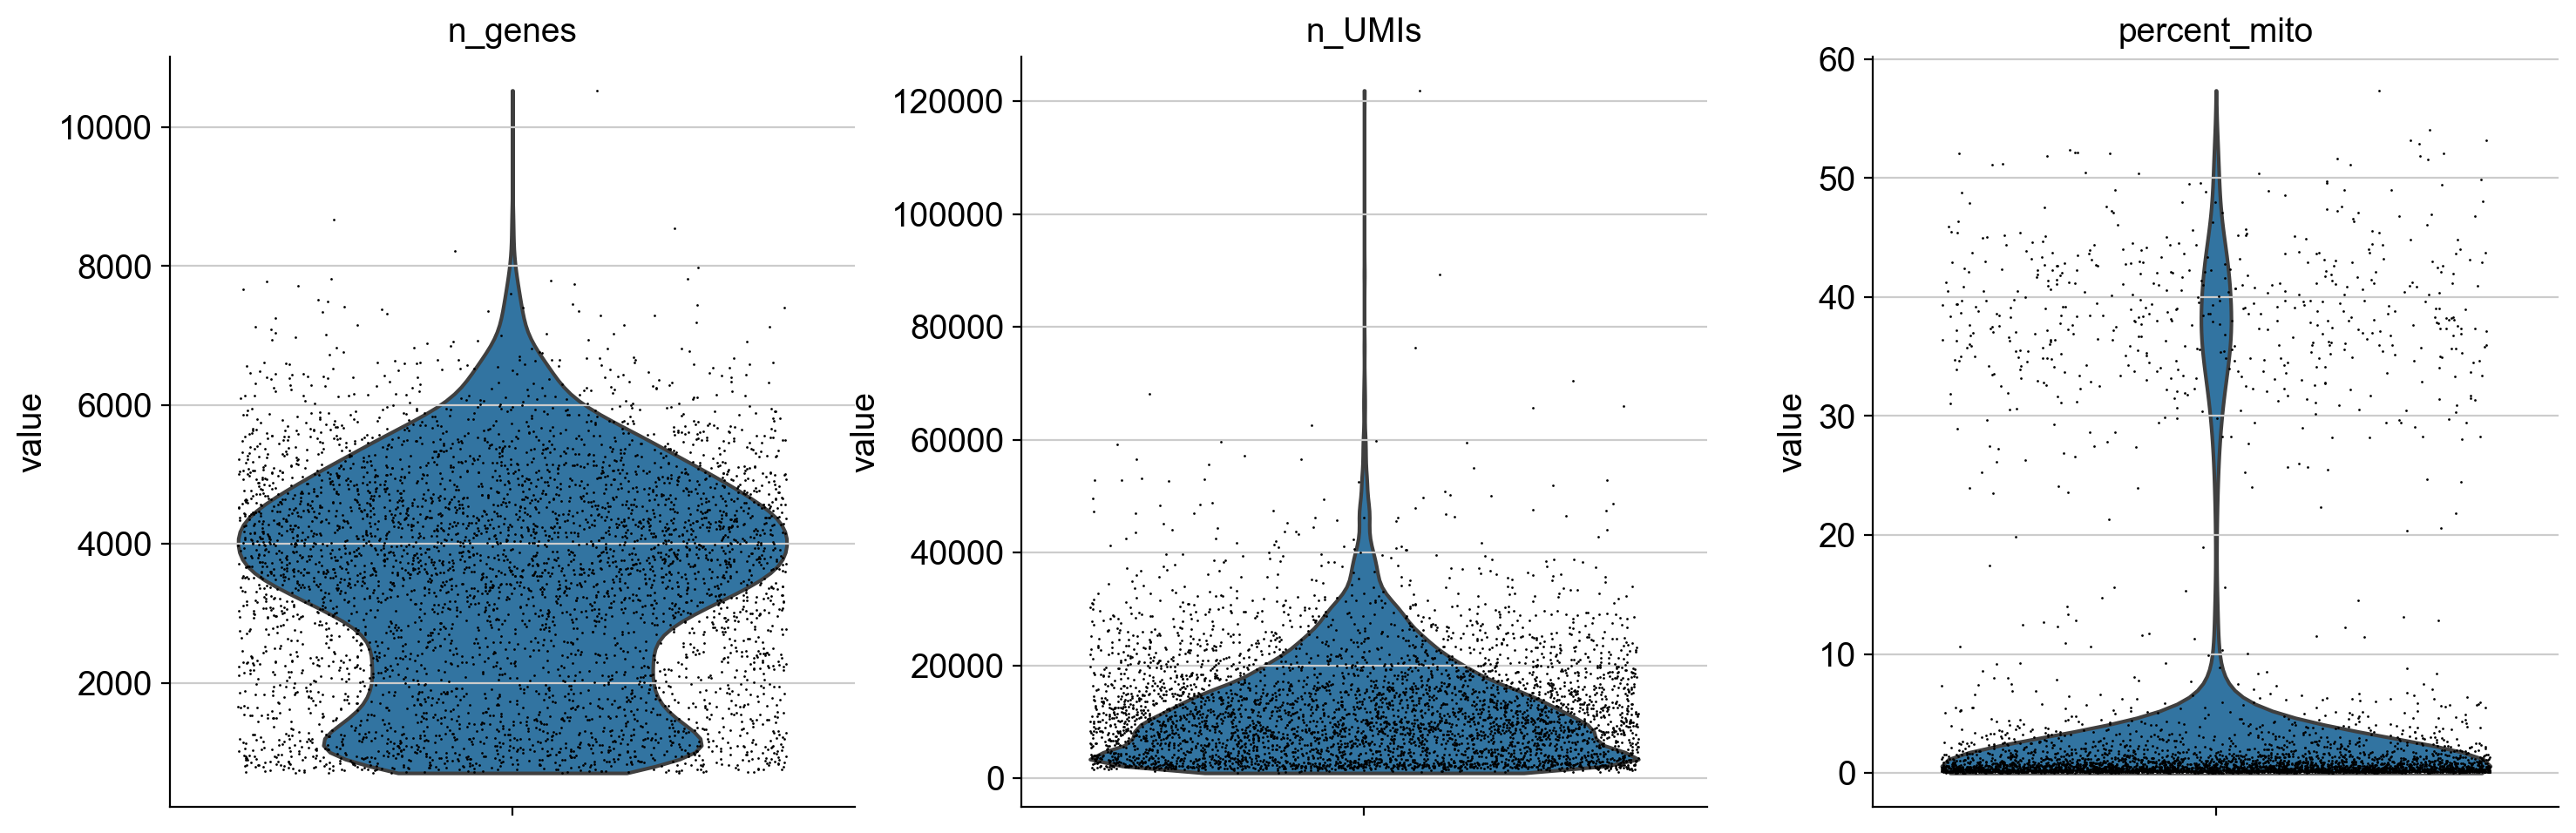

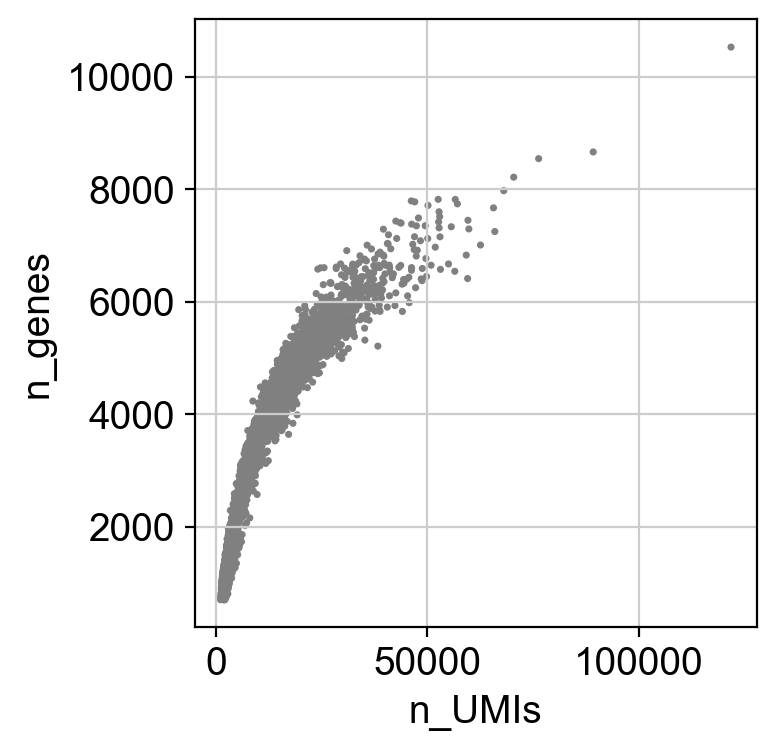

In [25]:
sc.pl.violin(adata_orig, ["n_genes", "n_UMIs", "percent_mito"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata_orig, x='n_UMIs', y='n_genes')

In [26]:
adata_orig = adata_orig[adata_orig.obs["percent_mito"] < 1, :]
adata_orig = adata_orig[adata_orig.obs["n_genes"] < 6500, :]
adata_orig = adata_orig[adata_orig.obs["n_UMIs"] < 40000, :]

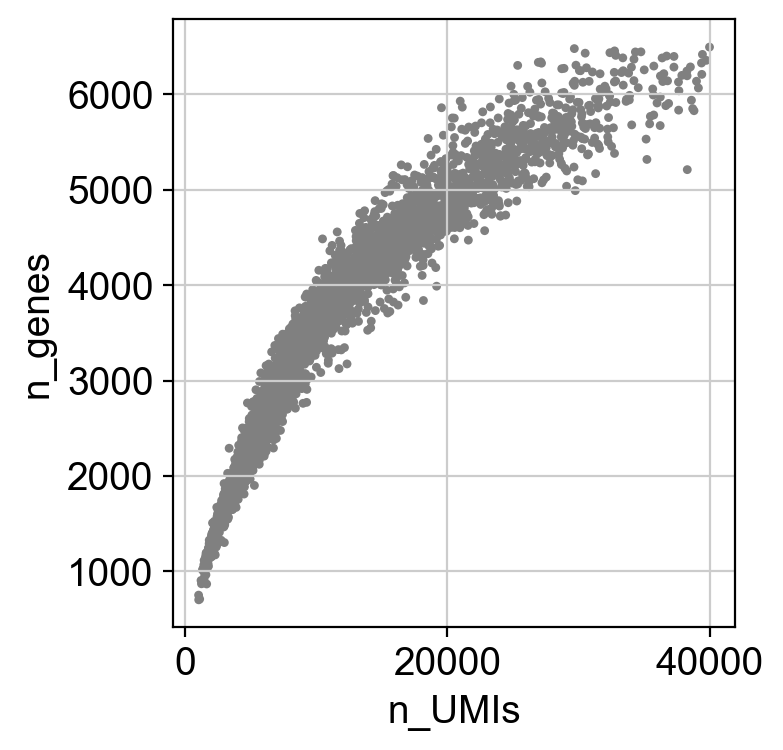

In [27]:
sc.pl.violin(adata_orig, ["n_genes", "n_UMIs", "percent_mito"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata_orig, x="n_UMIs", y="n_genes")

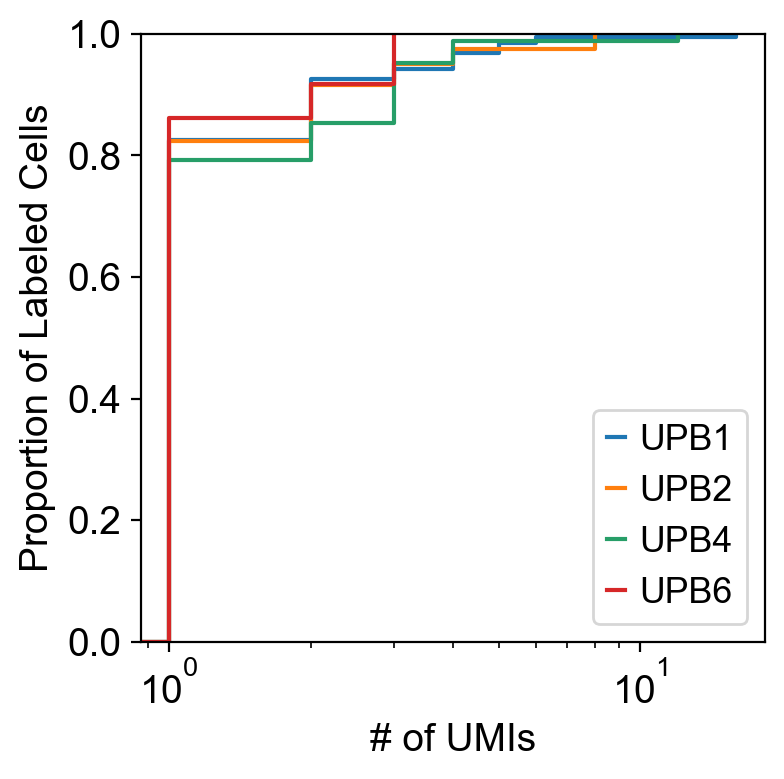

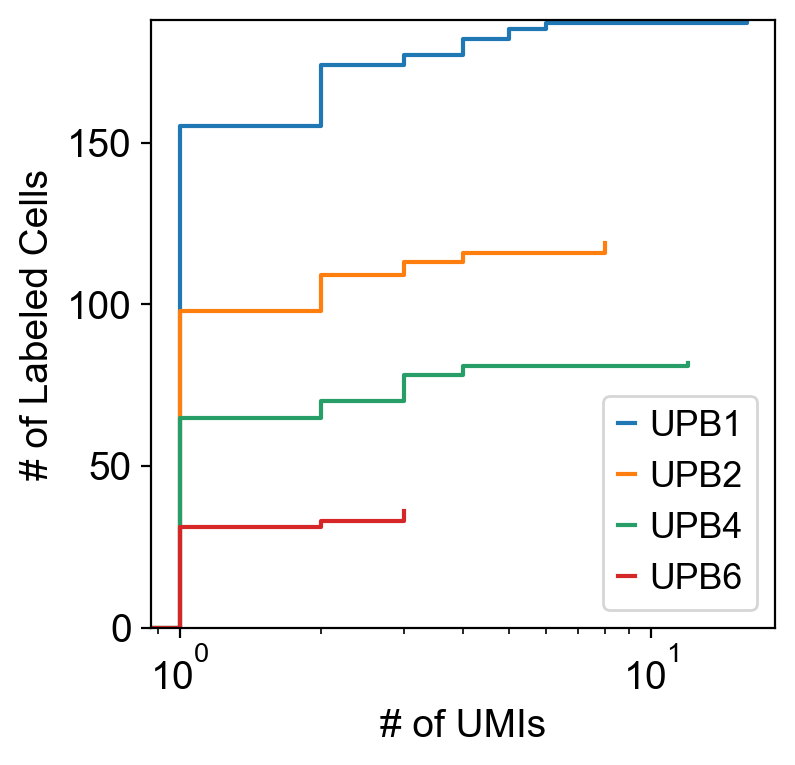

C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3886531075.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1000)
C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3886531075.py:42: UserWarning: The label '_' of <BarContainer object of 13 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3886531075.py:42: UserWarning: The label '_' of <BarContainer object of 10 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3886531075.py:42: UserWarning: The label '_' of <BarContainer object of 11 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
C:\Users\T

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

upbs = ["UPB1", "UPB2", "UPB4", "UPB6"] # 

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata_orig.obs[upb]) > 0
    adata_upb = adata_orig[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]), log_scale=(True, False))
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_ylabel("Proportion of Labeled Cells")
ax.legend(upbs, loc="lower right")
plt.show(block=False)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata_orig.obs[upb]) > 0
    adata_upb = adata_orig[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]), stat="count", log_scale=(True, False))
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_ylabel("# of Labeled Cells")
ax.legend(upbs, loc="lower right")
plt.show(block=False)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata_orig.obs[upb]) > 0
    adata_upb = adata_orig[upbs_mask, :]
    sns.histplot(data=np.array(adata_upb.obs[upb]), stat="count", binwidth=0.1, log_scale=(True, False)) # 
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_xlim(0, 1000)
ax.set_xscale("log")
ax.set_ylabel("# of Labeled Cells")
ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
plt.show(block=False)

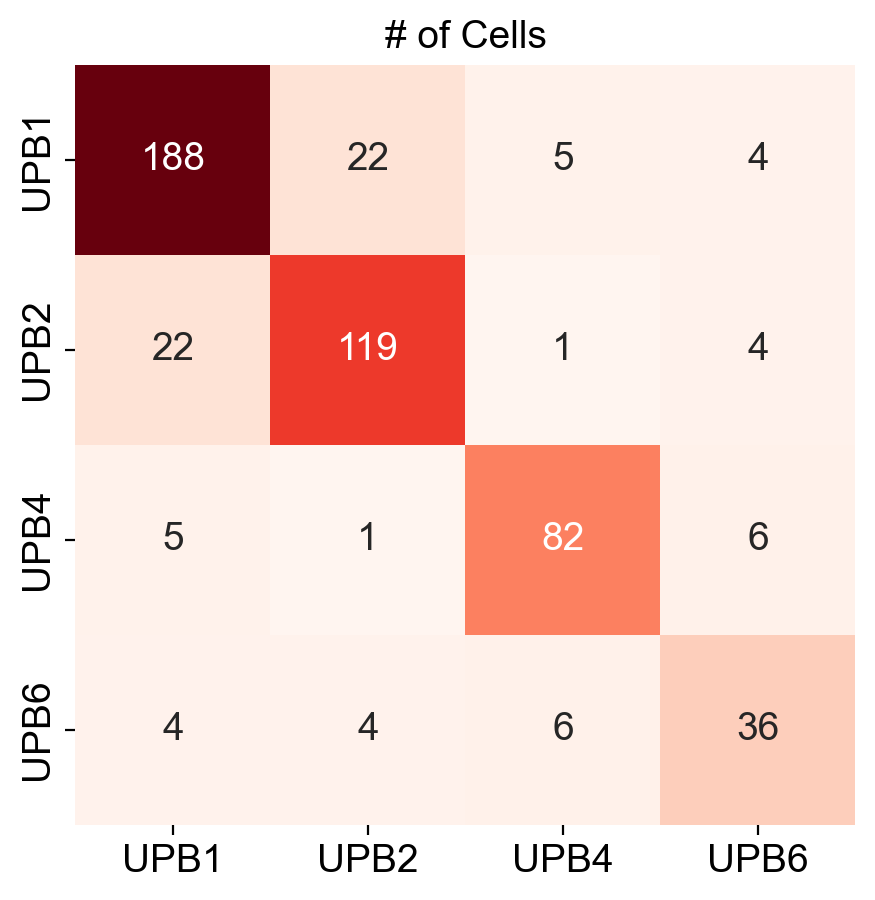

In [13]:
matrix = np.array(adata_orig.obs[["UPB1", "UPB2", "UPB4", "UPB6"]]) > 0
matrix = matrix.astype(int)
overlap = np.matmul(matrix.T, matrix)

fig, ax = plt.subplots()
sns.heatmap(overlap, cbar=False, annot=True, fmt=".0f", cmap="Reds")
ax.set_title("# of Cells")
ax.set_xticklabels(("UPB1", "UPB2", "UPB4", "UPB6"))
ax.set_yticklabels(("UPB1", "UPB2", "UPB4", "UPB6"))
ax.grid(False)
fig.set_size_inches(5, 5)
plt.show(block=False)

In [72]:
adata_orig.obs["UPBs"] = ["None"] * adata_orig.shape[0]

upb_combos = ["1", "2", "4", "6", "1-2", "1-4", "1-6", "2-4", "2-6", "4-6", "1-2-4", "1-2-6", "2-4-6", "1-2-4-6"]

for combo in upb_combos:
    cols = ["UPB" + dg for dg in combo.split("-")]
    mask = np.sum(adata_orig.obs[cols] > 0, axis=1) == len(cols)
    adata_orig.obs.loc[mask, "UPBs"] = combo

C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3910567250.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_orig.obs["UPBs"] = ["None"] * adata_orig.shape[0]


In [73]:
mask = (np.array(adata_orig.obs["UPBs"] == "1-4") 
    | np.array(adata_orig.obs["UPBs"] == "1-6")
    | np.array(adata_orig.obs["UPBs"] == "2-4")
    | np.array(adata_orig.obs["UPBs"] == "2-6")
    | np.array(adata_orig.obs["UPBs"] == "1-2-4")
    | np.array(adata_orig.obs["UPBs"] == "1-2-6")
    | np.array(adata_orig.obs["UPBs"] == "2-4-6")
    | np.array(adata_orig.obs["UPBs"] == "1-2-4-6"))

adata_orig.obs.loc[mask, "Invalid"] = "yes"
adata_orig.obs.loc[mask == False, "Invalid"] = "no"

In [85]:
fig, ax = plt.subplots()

df = adata_orig.obs
df = df[df["UPB6"] > 0]

sns.histplot(data=df, x="UPB6", hue="Invalid", log_scale=(True, True))
ax.grid(False)
ax.set_xlim((0, 100))

C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\2572051696.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim((0, 100))


(0.9465508226401592, 100)

Mix Original Data with P28NR

In [14]:
data_path = "E:/Mouse_V1/P28NR/"
adata_counts = sc.read_csv("E:/Mouse_V1/P28NR/GSE190940_P28NR.csv")

sample_IDs = ["P28_glut", "P28_gaba", "P28_non"] # 

accum_adata_cell, cell_count = [], 0
for sample in sample_IDs:
    pre_path = data_path + sample + ".h5ad"
    temp_adata_cell = sc.read_h5ad(
        pre_path,
                              )
    temp_adata_cell.var_names_make_unique()
    if "P28" in sample:
        obs_names = [name[:29] for name in temp_adata_cell.obs_names]
        X_counts = adata_counts[obs_names, temp_adata_cell.var_names].X
        temp_adata_cell.X = X_counts
    accum_adata_cell.append(temp_adata_cell)
    cell_count += temp_adata_cell.n_obs

adata_cell = accum_adata_cell[0].concatenate(*accum_adata_cell[1:], batch_categories=sample_IDs)
adata_cell

c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 23930 × 24372
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'sample_new', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells-P28_gaba', 'highly_variable-0-P28_gaba', 'means-0-P28_gaba', 'dispersions-0-P28_gaba', 'dispersions_norm-0-P28_gaba', 'mean-0-P28_gaba', 'std-0-P28_gaba', 'highly_variable-1-P28_gaba', 'means-1-P28_gaba', 'dispersions-1-P28_gaba', 'dispersions_norm-1-P28_gaba', 'mean-1-P28_gaba', 'std-1-P28_gaba', 'highly_variable-2-P28_gaba', 'means-2-P28_gaba', 'dispersions-2-P28_gaba', 'dispersions_norm-2-P28_gaba', 'mean-2-P28_gaba', 'std-2-P28_gaba', 'highly_variable-3-P28_gaba', 'means-3-P28_gaba', 'dispersions-3-P28_gaba', 'dispersions_norm-3-P28_gaba', 'mean-3-P28_gaba', 'std-3-P28_gaba', 'highly_variable-4-P28_gaba', 'means-4-P28_gaba', 'dispersions-4-P28_gaba', 'dispersions_norm-4-P28_gaba', 'mean-4-P28_gaba

In [17]:
adata_mix = ad.concat([adata_orig, adata_cell], axis=0, join="outer", label="batch", keys=["Projection-seq", "Cell Paper"])

c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [61]:
mask = np.array(np.isnan(adata_mix.obs["UPB1"]))

for upb in ["UPB1", "UPB2", "UPB4", "UPB6"]:
    adata_mix.obs.loc[mask, upb] = 0.0

In [62]:
sc.pp.normalize_per_cell(adata_mix, counts_per_cell_after=1e4)
sc.pp.log1p(adata_mix)
adata_mix.raw = adata_mix
sc.pp.highly_variable_genes(adata_mix, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata_mix, max_value=10)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [64]:
sc.tl.pca(adata_mix, svd_solver="arpack")
sce.pp.harmony_integrate(adata_mix, "batch", max_iter_harmony=20)
sc.pp.neighbors(adata_mix, n_neighbors=25, use_rep='X_pca_harmony')
sc.tl.leiden(adata_mix, key_added="leiden")
sc.tl.umap(adata_mix)
sc.pl.umap(adata_mix, color=["leiden"], legend_loc="on data")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


2023-07-05 16:14:26,268 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-05 16:14:34,457 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-05 16:14:34,684 - harmonypy - INFO - Iteration 1 of 20
2023-07-05 16:14:48,223 - harmonypy - INFO - Iteration 2 of 20
2023-07-05 16:15:01,746 - harmonypy - INFO - Iteration 3 of 20
2023-07-05 16:15:15,239 - harmonypy - INFO - Converged after 3 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


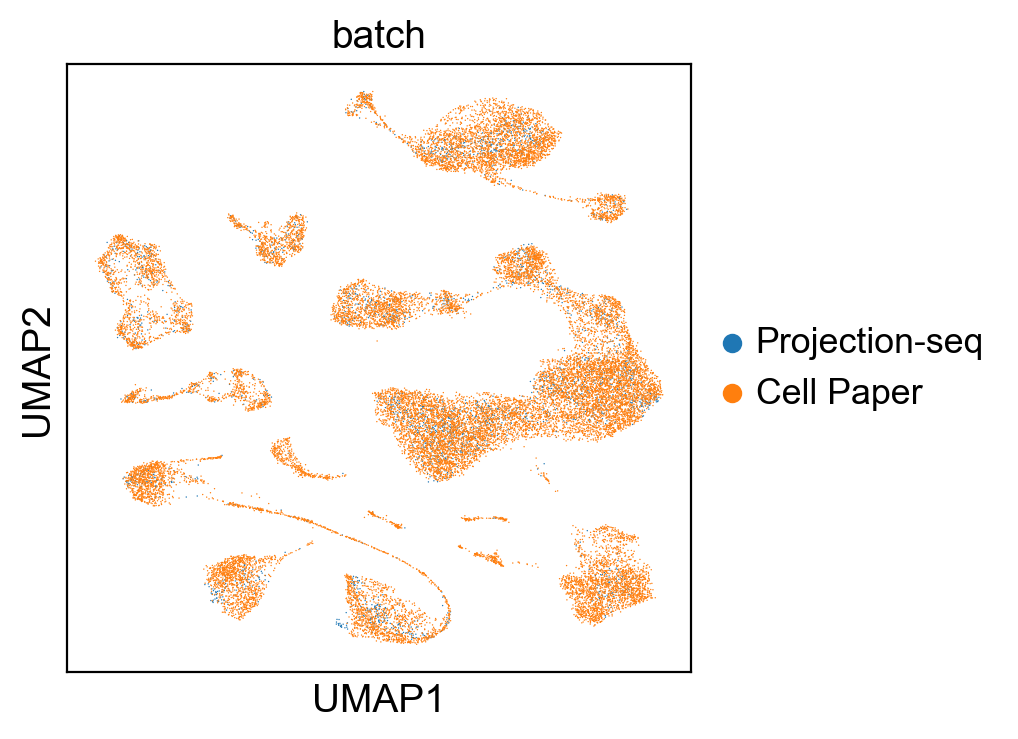

In [65]:
sc.pl.umap(adata_mix, color=["batch"], alpha=1, size=1)

In [66]:
cluster_ids = sorted(np.unique(adata_mix.obs["leiden"]).astype(int))
sample_fractions = []
for sample in ["Cell Paper", "Projection-seq"]:
    sf = []
    for cluster in cluster_ids:
        adata_clust = adata_mix[adata_mix.obs["leiden"] == str(cluster), :]
        sf.append(np.sum(adata_clust.obs["batch"] == sample) / adata_clust.shape[0])
    sample_fractions.append(sf)

fig, ax = plt.subplots()
bottom = np.zeros(len(cluster_ids))
for sf, col in zip(sample_fractions, adata_mix.uns["batch_colors"]):
    ax.bar(cluster_ids, sf, color=col, edgecolor=col, bottom=bottom)
    bottom += np.array(sf)
ax.set_xlabel("cluster ID")
ax.set_xlim((-0.75, np.max(cluster_ids) + 0.75))
ax.set_xticks(cluster_ids)
ax.set_xticklabels(cluster_ids, fontsize=12)
ax.set_ylabel("dataset fraction")
ax.set_ylim((0, 1))
ax.grid(False)
fig.set_size_inches(8, 4)
plt.show(block=False)

In [67]:
adata_mix.obs["UPBs"] = [None] * adata_mix.shape[0]

upb_combos = ["1", "2", "4", "6", "1-2", "1-4", "1-6", "2-4", "2-6", "4-6", "1-2-4", "1-2-6", "2-4-6", "1-2-4-6"]

for combo in upb_combos:
    cols = ["UPB" + dg for dg in combo.split("-")]
    mask = np.sum(adata_mix.obs[cols] > 0, axis=1) == len(cols)
    adata_mix.obs.loc[mask, "UPBs"] = combo

In [68]:
sc.pl.umap(adata_mix, color=["UPBs"], na_in_legend=False)

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Add Spike-in Data for Individual Cellranger

In [121]:
data_path = "E:/Projection-seq/UPB_Spike/"

adata_spike = adata_orig.copy()
orig_names = adata_orig.obs_names

UPBs = ["UPB1", "UPB2", "UPB4", "UPB6"]

for upb in UPBs:
    raw_path = data_path + upb + "_BC1" + "/outs/filtered_feature_bc_matrix.h5"
    temp_adata_spike = sc.read_10x_h5(
        raw_path,
                              )
    temp_adata_spike.var_names_make_unique()
    x_names = []
    for name in temp_adata_spike.obs_names:
        if name in orig_names:
            x_names.append(name)
    temp_adata_spike = temp_adata_spike[x_names, :].copy()
    adata_spike.obs.loc[temp_adata_spike.obs_names, upb] = temp_adata_spike[:, upb].X.toarray().astype(int).copy()

reading E:/Projection-seq/UPB_Spike/UPB1_BC1/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading E:/Projection-seq/UPB_Spike/UPB2_BC1/outs/filtered_feature_bc_matrix.h5
 (0:00:00)
reading E:/Projection-seq/UPB_Spike/UPB4_BC1/outs/filtered_feature_bc_matrix.h5
 (0:00:00)
reading E:/Projection-seq/UPB_Spike/UPB6_BC1/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Add Spike-in Data for Full Cellranger

In [32]:
data_path = "E:/Projection-seq/UPB_Spike/"

adata_spike = adata_orig.copy()
orig_names = adata_orig.obs_names

raw_path = data_path + "UPB_Full" + "/outs/filtered_feature_bc_matrix.h5"
temp_adata_spike = sc.read_10x_h5(
    raw_path,
                              )
temp_adata_spike.var_names_make_unique()
x_names = []
for name in temp_adata_spike.obs_names:
    if name in orig_names:
        x_names.append(name)
temp_adata_spike = temp_adata_spike[x_names, :].copy()
adata_spike.obs.loc[temp_adata_spike.obs_names, ["UPB1", "UPB2", "UPB4", "UPB6"]] = temp_adata_spike[:, ["UPB1", "UPB2", "UPB4", "UPB6"]].X.toarray().astype(int).copy()

reading E:/Projection-seq/UPB_Spike/UPB_Full/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
import scanpy as sc
import numpy as np

data_path = "E:/Projection-seq/UPB_Spike/"

raw_path = data_path + "UPB_Full" + "/outs/raw_feature_bc_matrix.h5"
adata_spike_raw = sc.read_10x_h5(
    raw_path,
                              )
adata_spike_raw.var_names_make_unique()
adata_spike_raw.obs[["UPB1", "UPB2", "UPB4", "UPB6"]] = adata_spike_raw[:, ["UPB1", "UPB2", "UPB4", "UPB6"]].X.toarray().astype(int).copy()

c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [11]:
adata_spike_raw.obs

UPB1  UPB2  UPB4  UPB6     UPBs
AAACCCAAGAAATTCG-1     1     0     0     0        1
AAACCCAAGAACAGGA-1     0     0     0     0     None
AAACCCAAGAAGCTCG-1     0     0     0     0     None
AAACCCAAGACATCCT-1     0     0     1     0        4
AAACCCAAGACTTAAG-1     6     2     3     1  1-2-4-6
...                  ...   ...   ...   ...      ...
TTTGTTGTCTTACGTT-1     0     0     0     0     None
TTTGTTGTCTTCGTGC-1     0     0     0     0     None
TTTGTTGTCTTCTTCC-1     0     0     0     0     None
TTTGTTGTCTTGGGCG-1     0     0     0     0     None
TTTGTTGTCTTTGCGC-1     0     0     0     0     None

[142166 rows x 5 columns]

In [33]:
adata_spike_raw.obs["UPBs"] = ["None"] * adata_spike_raw.shape[0]

upb_combos = ["1", "2", "4", "6", "1-2", "1-4", "1-6", "2-4", "2-6", "4-6", "1-2-4", "1-2-6", "2-4-6", "1-2-4-6"]

for combo in upb_combos:
    cols = ["UPB" + dg for dg in combo.split("-")]
    mask = np.sum(adata_spike_raw.obs[cols] > 0, axis=1) == len(cols)
    adata_spike_raw.obs.loc[mask, "UPBs"] = combo

In [12]:
mask = (np.array(adata_spike_raw.obs["UPBs"] == "1-4") 
    | np.array(adata_spike_raw.obs["UPBs"] == "1-6")
    | np.array(adata_spike_raw.obs["UPBs"] == "2-4")
    | np.array(adata_spike_raw.obs["UPBs"] == "2-6")
    | np.array(adata_spike_raw.obs["UPBs"] == "1-2-4")
    | np.array(adata_spike_raw.obs["UPBs"] == "1-2-6")
    | np.array(adata_spike_raw.obs["UPBs"] == "2-4-6")
    | np.array(adata_spike_raw.obs["UPBs"] == "1-2-4-6"))

adata_spike_raw.obs.loc[mask, "Invalid"] = "yes"
adata_spike_raw.obs.loc[mask == False, "Invalid"] = "no"

(0.0, 80.0)

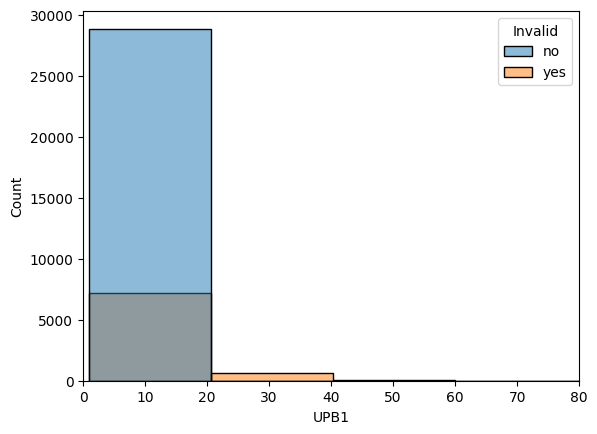

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

df = adata_spike_raw.obs
df = df[df["UPB1"] > 0]

sns.histplot(data=df, x="UPB1", hue="Invalid")
ax.grid(False)
ax.set_xlim((0, 80))

In [14]:
df

UPB1  UPB2  UPB4  UPB6     UPBs Invalid
AAACCCAAGAAATTCG-1     1     0     0     0        1      no
AAACCCAAGAACAGGA-1     0     0     0     0     None      no
AAACCCAAGAAGCTCG-1     0     0     0     0     None      no
AAACCCAAGACATCCT-1     0     0     1     0        4      no
AAACCCAAGACTTAAG-1     6     2     3     1  1-2-4-6     yes
...                  ...   ...   ...   ...      ...     ...
TTTGTTGTCTTACGTT-1     0     0     0     0     None      no
TTTGTTGTCTTCGTGC-1     0     0     0     0     None      no
TTTGTTGTCTTCTTCC-1     0     0     0     0     None      no
TTTGTTGTCTTGGGCG-1     0     0     0     0     None      no
TTTGTTGTCTTTGCGC-1     0     0     0     0     None      no

[142166 rows x 6 columns]

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

upbs = ["UPB1", "UPB2", "UPB4", "UPB6"] # 

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata_spike.obs[upb]) > 0
    adata_upb = adata_spike[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]), log_scale=(True, False))
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_ylabel("Proportion of Labeled Cells")
ax.legend(upbs, loc="lower right")
plt.show(block=False)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata_spike.obs[upb]) > 0
    adata_upb = adata_spike[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]), stat="count", log_scale=(True, False))
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_ylabel("# of Labeled Cells")
ax.legend(upbs, loc="lower right")
plt.show(block=False)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata_spike.obs[upb]) > 0
    adata_upb = adata_spike[upbs_mask, :]
    sns.histplot(data=np.array(adata_upb.obs[upb]), stat="count", binwidth=0.1, log_scale=(True, False)) # 
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_xlim(0, 1000)
ax.set_xscale("log")
ax.set_ylabel("# of Labeled Cells")
ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
plt.show(block=False)

C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3669022183.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1000)
C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3669022183.py:42: UserWarning: The label '_' of <BarContainer object of 26 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3669022183.py:42: UserWarning: The label '_' of <BarContainer object of 24 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\3669022183.py:42: UserWarning: The label '_' of <BarContainer object of 25 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(["UPB1", "_", "UPB2", "_", "UPB4", "_", "UPB6", "_"], loc="upper right")
C:\Users\T

In [21]:
matrix = np.array(adata_spike.obs[["UPB1", "UPB2", "UPB4", "UPB6"]]) > 0
matrix = matrix.astype(int)
overlap = np.matmul(matrix.T, matrix)

fig, ax = plt.subplots()
sns.heatmap(overlap, cbar=False, annot=True, fmt=".0f", cmap="Reds")
ax.set_title("# of Cells")
ax.set_xticklabels(("UPB1", "UPB2", "UPB4", "UPB6"))
ax.set_yticklabels(("UPB1", "UPB2", "UPB4", "UPB6"))
ax.grid(False)
fig.set_size_inches(5, 5)
plt.show(block=False)

In [22]:
data_path = "E:/Mouse_V1/P28NR/"
adata_counts = sc.read_csv("E:/Mouse_V1/P28NR/GSE190940_P28NR.csv")

sample_IDs = ["P28_glut", "P28_gaba", "P28_non"] # 

accum_adata_cell, cell_count = [], 0
for sample in sample_IDs:
    pre_path = data_path + sample + ".h5ad"
    temp_adata_cell = sc.read_h5ad(
        pre_path,
                              )
    temp_adata_cell.var_names_make_unique()
    if "P28" in sample:
        obs_names = [name[:29] for name in temp_adata_cell.obs_names]
        X_counts = adata_counts[obs_names, temp_adata_cell.var_names].X
        temp_adata_cell.X = X_counts
    accum_adata_cell.append(temp_adata_cell)
    cell_count += temp_adata_cell.n_obs

adata_cell = accum_adata_cell[0].concatenate(*accum_adata_cell[1:], batch_categories=sample_IDs)
adata_cell

c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 23930 × 24372
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'sample_new', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells-P28_gaba', 'highly_variable-0-P28_gaba', 'means-0-P28_gaba', 'dispersions-0-P28_gaba', 'dispersions_norm-0-P28_gaba', 'mean-0-P28_gaba', 'std-0-P28_gaba', 'highly_variable-1-P28_gaba', 'means-1-P28_gaba', 'dispersions-1-P28_gaba', 'dispersions_norm-1-P28_gaba', 'mean-1-P28_gaba', 'std-1-P28_gaba', 'highly_variable-2-P28_gaba', 'means-2-P28_gaba', 'dispersions-2-P28_gaba', 'dispersions_norm-2-P28_gaba', 'mean-2-P28_gaba', 'std-2-P28_gaba', 'highly_variable-3-P28_gaba', 'means-3-P28_gaba', 'dispersions-3-P28_gaba', 'dispersions_norm-3-P28_gaba', 'mean-3-P28_gaba', 'std-3-P28_gaba', 'highly_variable-4-P28_gaba', 'means-4-P28_gaba', 'dispersions-4-P28_gaba', 'dispersions_norm-4-P28_gaba', 'mean-4-P28_gaba

In [24]:
adata = ad.concat([adata_spike, adata_cell], axis=0, join="outer", label="batch", keys=["Projection-seq", "Cell Paper"])

c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [25]:
mask = np.array(np.isnan(adata.obs["UPB1"]))

for upb in ["UPB1", "UPB2", "UPB4", "UPB6"]:
    adata.obs.loc[mask, upb] = 0.0

In [26]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


2023-07-05 15:49:00,989 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-05 15:49:08,554 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-05 15:49:08,780 - harmonypy - INFO - Iteration 1 of 20
2023-07-05 15:49:22,006 - harmonypy - INFO - Iteration 2 of 20
2023-07-05 15:49:35,153 - harmonypy - INFO - Iteration 3 of 20
2023-07-05 15:49:48,215 - harmonypy - INFO - Converged after 3 iterations


computing neighbors


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:40)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


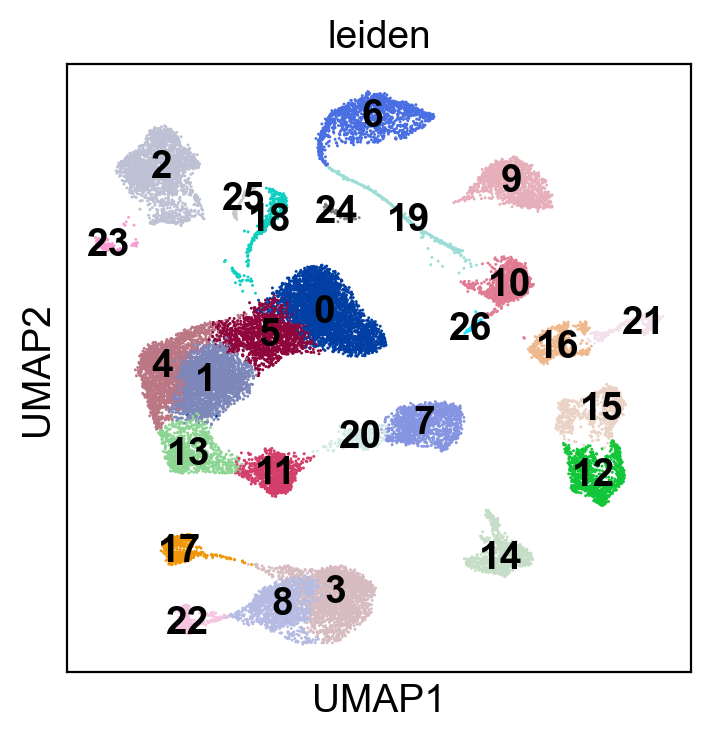

In [27]:
import scanpy.external as sce

sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch", max_iter_harmony=20)
sc.pp.neighbors(adata, n_neighbors=25, use_rep='X_pca_harmony')
sc.tl.leiden(adata, key_added="leiden")
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


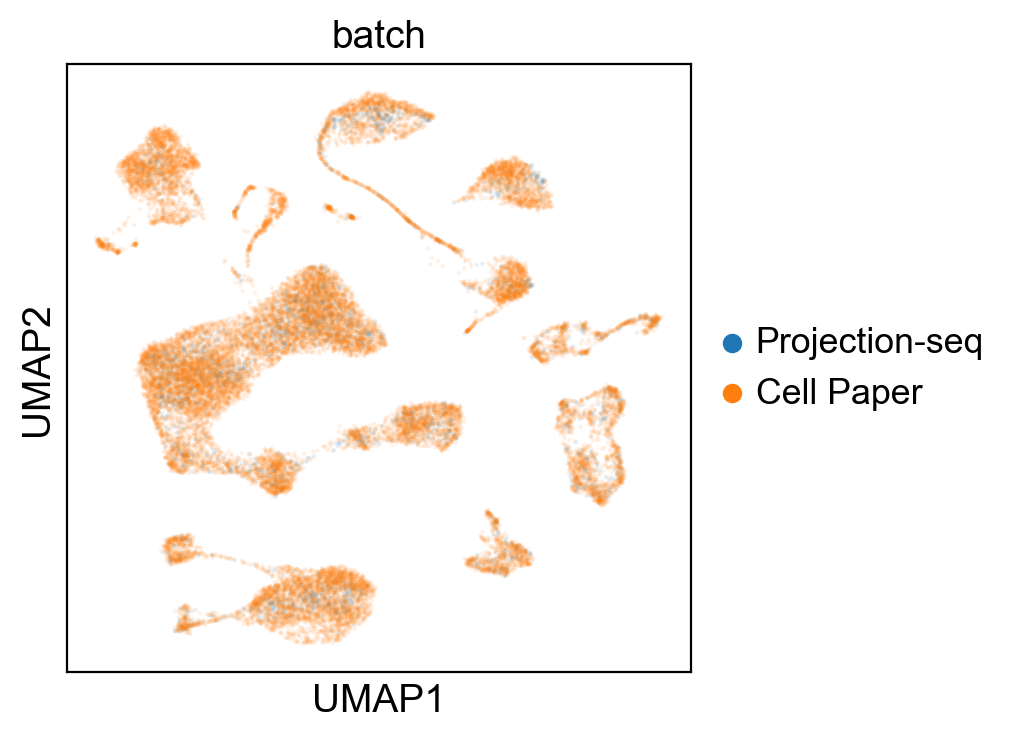

In [41]:
sc.pl.umap(adata, color=["batch"], alpha=0.1, size=10)

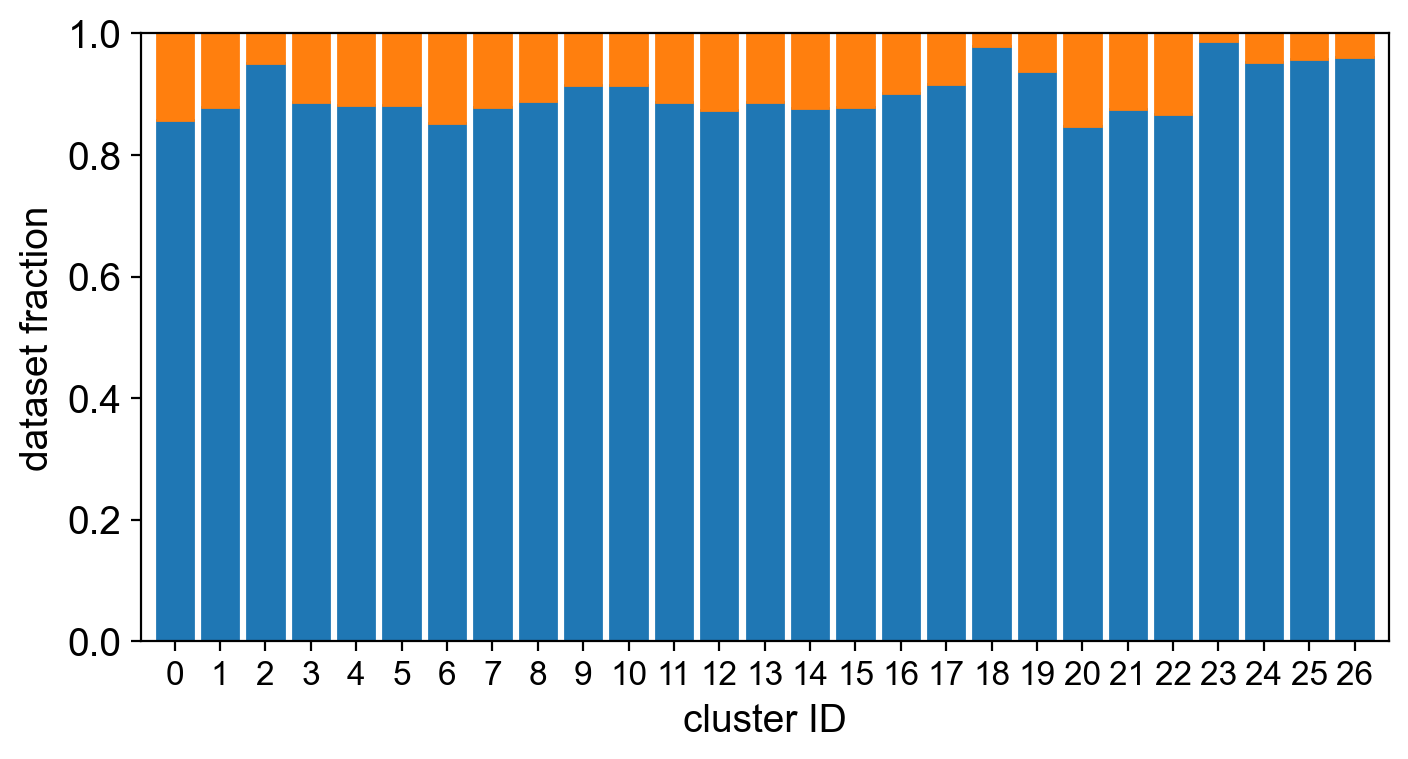

In [29]:
cluster_ids = sorted(np.unique(adata.obs["leiden"]).astype(int))
sample_fractions = []
for sample in ["Cell Paper", "Projection-seq"]:
    sf = []
    for cluster in cluster_ids:
        adata_clust = adata[adata.obs["leiden"] == str(cluster), :]
        sf.append(np.sum(adata_clust.obs["batch"] == sample) / adata_clust.shape[0])
    sample_fractions.append(sf)

fig, ax = plt.subplots()
bottom = np.zeros(len(cluster_ids))
for sf, col in zip(sample_fractions, adata.uns["batch_colors"]):
    ax.bar(cluster_ids, sf, color=col, edgecolor=col, bottom=bottom)
    bottom += np.array(sf)
ax.set_xlabel("cluster ID")
ax.set_xlim((-0.75, np.max(cluster_ids) + 0.75))
ax.set_xticks(cluster_ids)
ax.set_xticklabels(cluster_ids, fontsize=12)
ax.set_ylabel("dataset fraction")
ax.set_ylim((0, 1))
ax.grid(False)
fig.set_size_inches(8, 4)
plt.show(block=False)

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


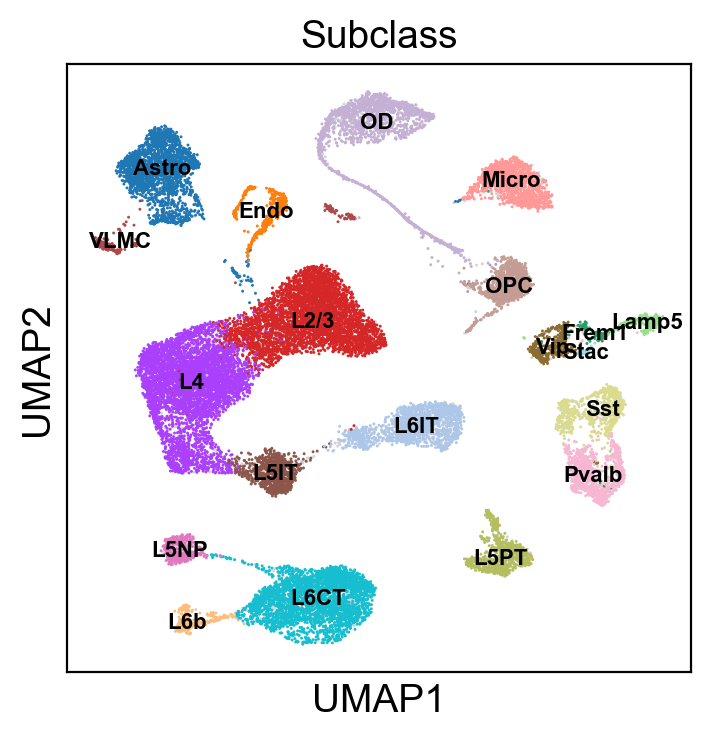

In [30]:
sc.pl.umap(adata, color=["Subclass"], legend_loc="on data", na_in_legend=False, legend_fontsize=8)

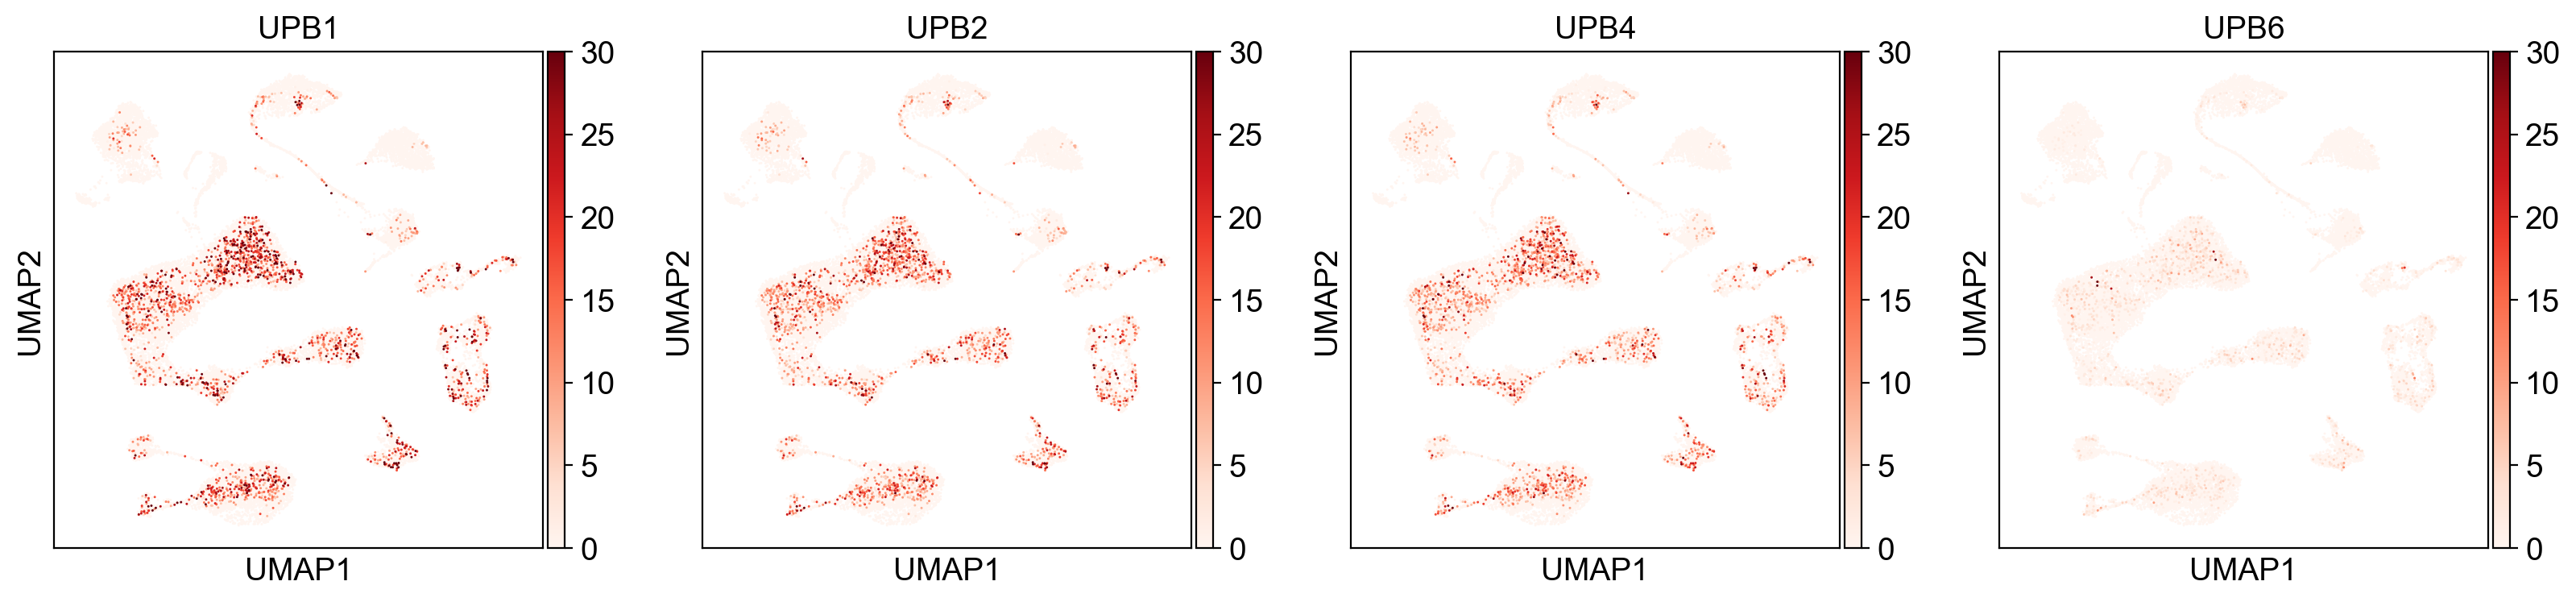

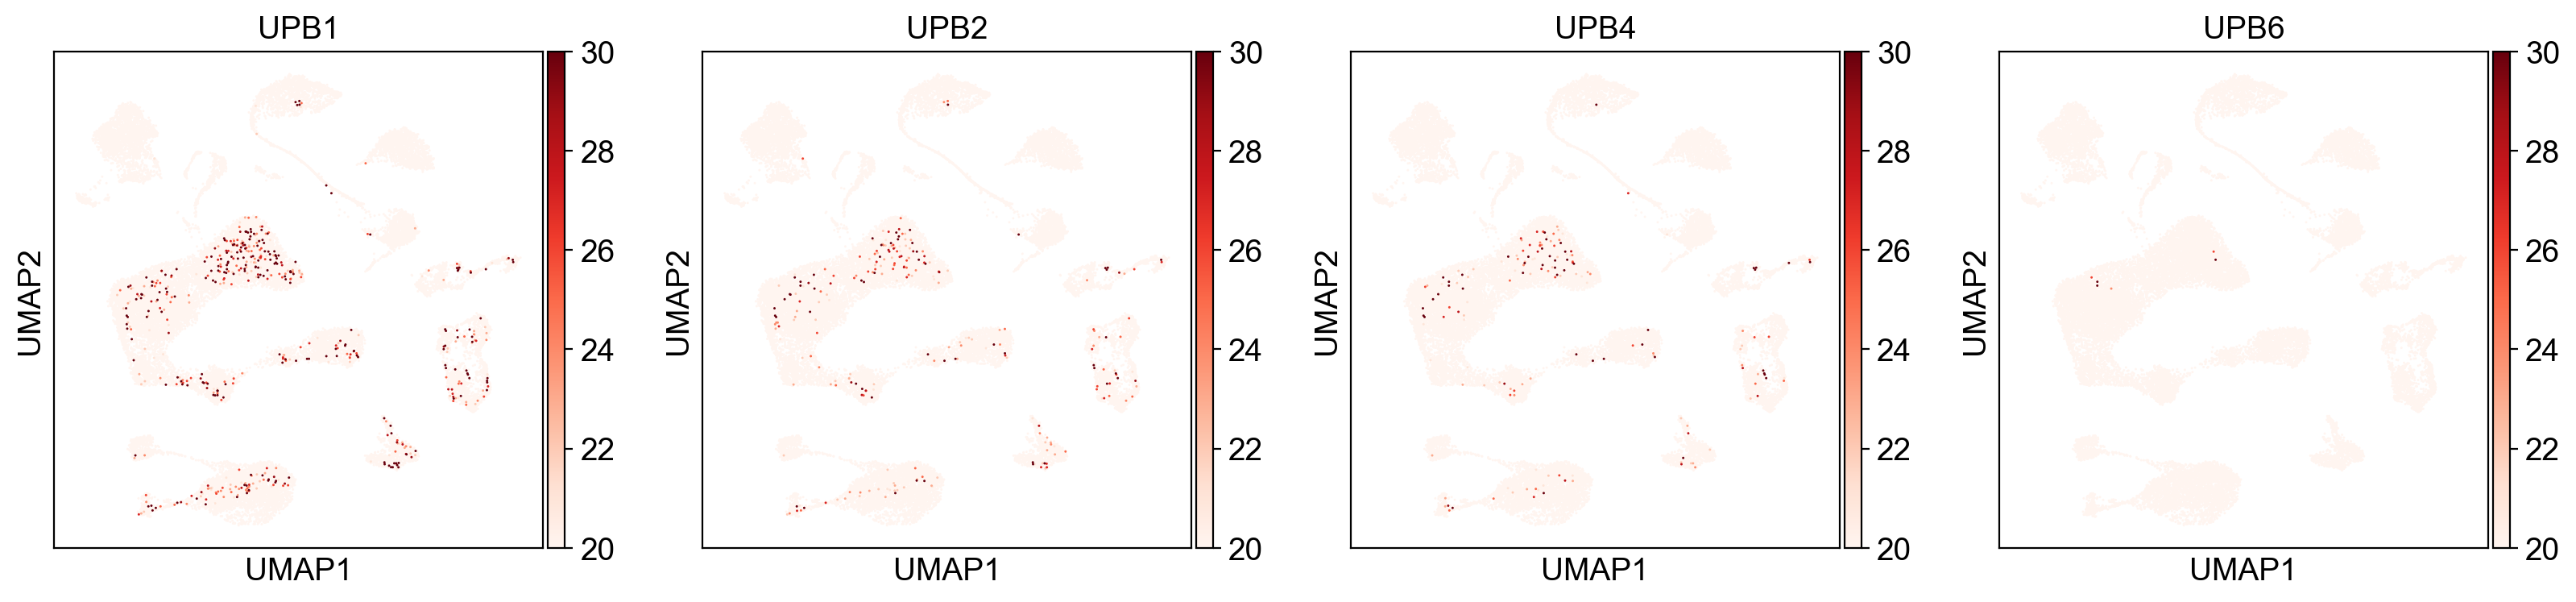

In [31]:
sc.pl.umap(adata, color=["UPB1", "UPB2", "UPB4", "UPB6"], color_map="Reds", vmin=0, vmax=30)
sc.pl.umap(adata, color=["UPB1", "UPB2", "UPB4", "UPB6"], color_map="Reds", vmin=20, vmax=30)

In [68]:
adata_spike.obs["UPBs"] = ["None"] * adata_spike.shape[0]

upb_combos = ["1", "2", "4", "6", "1-2", "1-4", "1-6", "2-4", "2-6", "4-6", "1-2-4", "1-2-6", "2-4-6", "1-2-4-6"]

for combo in upb_combos:
    cols = ["UPB" + dg for dg in combo.split("-")]
    mask = np.sum(adata_spike.obs[cols] > 0, axis=1) == len(cols)
    adata_spike.obs.loc[mask, "UPBs"] = combo

In [48]:
adata_spike.obs

UPB1  UPB2  UPB4  UPB6     UPBs     LM     RL VISs   
AAACCCAAGACTTAAG-1     0     0     0     0        X  False  False  NaN  \
AAACCCAAGTATTGCC-1    17    20    26     2  1-2-4-6  False  False  NaN   
AAACGAAAGACGCTCC-1     7     4     5     2  1-2-4-6  False  False  NaN   
AAACGAACATGATAGA-1     6     3     5     0    1-2-4   True  False   LM   
AAACGAATCCAGTGTA-1    13     2     6     0    1-2-4  False  False  NaN   
...                  ...   ...   ...   ...      ...    ...    ...  ...   
TTTGGTTAGTAGCATA-1     0     0     0     0        X  False  False  NaN   
TTTGGTTGTAAGCGGT-1    20     7     8     1  1-2-4-6  False  False  NaN   
TTTGTTGAGAGCCTGA-1     9     2     8     0    1-2-4  False  False  NaN   
TTTGTTGCAAACGAGC-1    15    13    13     1  1-2-4-6  False  False  NaN   
TTTGTTGTCAGCCCAG-1     0     0     0     0        X  False  False  NaN   

                    n_genes  percent_mito  n_UMIs  
AAACCCAAGACTTAAG-1     3059      0.875724    7765  
AAACCCAAGTATTGCC-1     6286      0.072460   37262  
AAACGAAAGACGCTCC-1     3090      0.382514    7320  
AAACGAACATGATAGA-1     3940      0.166826   12588  
AAACGAATCCAGTGTA-1     2601      0.431379    6259  
...                     ...           ...     ...  
TTTGGTTAGTAGCATA-1     2251      0.221595    4964  
TTTGGTTGTAAGCGGT-1     3958      0.744249   11824  
TTTGTTGAGAGCCTGA-1     3414      0.163599    7335  
TTTGTTGCAAACGAGC-1     4566      0.027544   18153  
TTTGTTGTCAGCCCAG-1     2371      0.355082    4506  

[2961 rows x 11 columns]

In [69]:
sc.pl.umap(adata, color=["UPBs"], na_in_legend=False)

NameError: name 'adata' is not defined

In [145]:
adata.obs[adata.obs["UPBs"] == "1-2-4-6"]

UPB1  UPB2  UPB4  UPB6     UPBs     LM     RL   VISs   
AAACCCAAGTATTGCC-1  17.0  20.0  26.0   2.0  1-2-4-6  False  False    NaN  \
AAACGAAAGACGCTCC-1   7.0   4.0   5.0   2.0  1-2-4-6  False  False    NaN   
AAACGCTAGTTTCAGC-1  18.0   6.0   4.0   1.0  1-2-4-6  False  False    NaN   
AAACGCTCAGAGGCTA-1  21.0  12.0   5.0   3.0  1-2-4-6   True   True  LM-RL   
AAACGCTTCAAGAAAC-1  20.0   9.0   8.0   2.0  1-2-4-6  False  False    NaN   
...                  ...   ...   ...   ...      ...    ...    ...    ...   
TTTGACTCATGAGTAA-1  14.0  15.0  16.0   2.0  1-2-4-6  False  False    NaN   
TTTGGAGAGTTGAAAC-1   5.0   6.0   7.0   1.0  1-2-4-6  False  False    NaN   
TTTGGAGTCGCAAGAG-1  24.0  19.0  19.0   2.0  1-2-4-6   True  False     LM   
TTTGGTTGTAAGCGGT-1  20.0   7.0   8.0   1.0  1-2-4-6  False  False    NaN   
TTTGTTGCAAACGAGC-1  15.0  13.0  13.0   1.0  1-2-4-6  False  False    NaN   

                    n_genes  percent_mito  ...  cluster Class_broad  sample   
AAACCCAAGTATTGCC-1     6286      0.072460  ...      NaN         NaN     NaN  \
AAACGAAAGACGCTCC-1     3090      0.382514  ...      NaN         NaN     NaN   
AAACGCTAGTTTCAGC-1     3721      0.090253  ...      NaN         NaN     NaN   
AAACGCTCAGAGGCTA-1     4128      0.086644  ...      NaN         NaN     NaN   
AAACGCTTCAAGAAAC-1     6086      0.108669  ...      NaN         NaN     NaN   
...                     ...           ...  ...      ...         ...     ...   
TTTGACTCATGAGTAA-1     5363      0.218713  ...      NaN         NaN     NaN   
TTTGGAGAGTTGAAAC-1     3364      0.482972  ...      NaN         NaN     NaN   
TTTGGAGTCGCAAGAG-1     4278      0.677966  ...      NaN         NaN     NaN   
TTTGGTTGTAAGCGGT-1     3958      0.744249  ...      NaN         NaN     NaN   
TTTGTTGCAAACGAGC-1     4566      0.027544  ...      NaN         NaN     NaN   

                    Age subclass  sample_new layer Type Subclass Invalid  
AAACCCAAGTATTGCC-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
AAACGAAAGACGCTCC-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
AAACGCTAGTTTCAGC-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
AAACGCTCAGAGGCTA-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
AAACGCTTCAAGAAAC-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
...                 ...      ...         ...   ...  ...      ...     ...  
TTTGACTCATGAGTAA-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
TTTGGAGAGTTGAAAC-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
TTTGGAGTCGCAAGAG-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
TTTGGTTGTAAGCGGT-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  
TTTGTTGCAAACGAGC-1  NaN      NaN         NaN   NaN  NaN      NaN     yes  

[1927 rows x 26 columns]

In [70]:
mask = (np.array(adata_spike.obs["UPBs"] == "1-4") 
    | np.array(adata_spike.obs["UPBs"] == "1-6")
    | np.array(adata_spike.obs["UPBs"] == "2-4")
    | np.array(adata_spike.obs["UPBs"] == "2-6")
    | np.array(adata_spike.obs["UPBs"] == "1-2-4")
    | np.array(adata_spike.obs["UPBs"] == "1-2-6")
    | np.array(adata_spike.obs["UPBs"] == "2-4-6")
    | np.array(adata_spike.obs["UPBs"] == "1-2-4-6"))

adata_spike.obs.loc[mask, "Invalid"] = "yes"
adata_spike.obs.loc[mask == False, "Invalid"] = "no"

C:\Users\TLab\AppData\Local\Temp\ipykernel_16124\731233061.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim((0, 100))


(0.8276131187348933, 100)

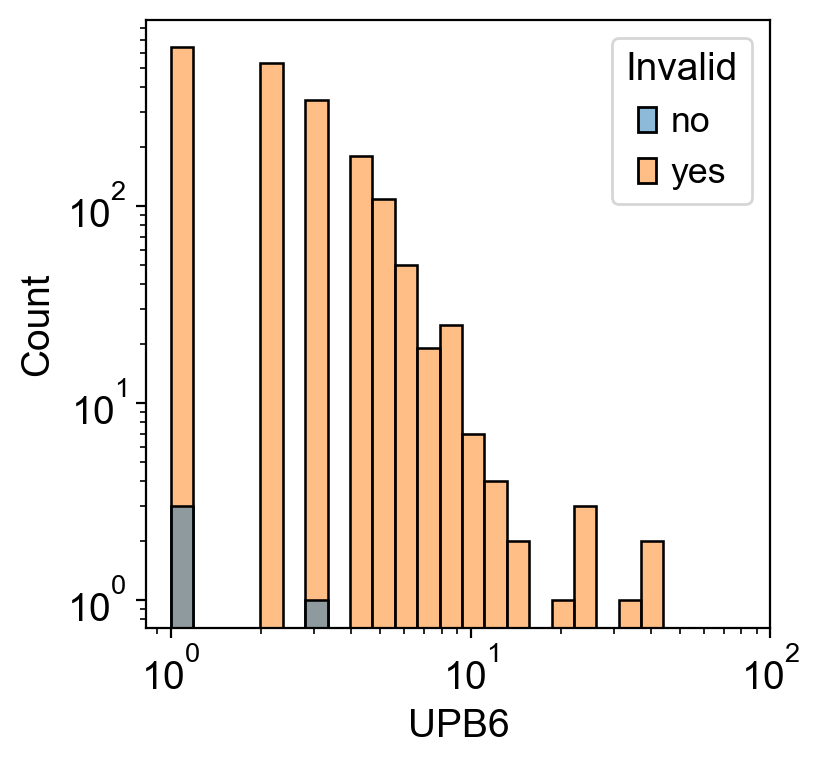

In [82]:
fig, ax = plt.subplots()

df = adata_spike.obs
df = df[df["UPB6"] > 0]

sns.histplot(data=df, x="UPB6", hue="Invalid", hue_order=("no", "yes"), log_scale=(True, True))
ax.grid(False)
ax.set_xlim((0, 100))

In [20]:
adata_spike.obs

UPB1  UPB2  UPB4  UPB6     UPBs     LM     RL VISs   
AAACCCAAGACTTAAG-1     0     0     0     0     None  False  False  NaN  \
AAACCCAAGTATTGCC-1    17    20    26     2  1-2-4-6  False  False  NaN   
AAACGAAAGACGCTCC-1     7     4     5     2  1-2-4-6  False  False  NaN   
AAACGAACATGATAGA-1     6     3     5     0    1-2-4   True  False   LM   
AAACGAATCCAGTGTA-1    13     2     6     0    1-2-4  False  False  NaN   
...                  ...   ...   ...   ...      ...    ...    ...  ...   
TTTGGTTAGTAGCATA-1     0     0     0     0     None  False  False  NaN   
TTTGGTTGTAAGCGGT-1    20     7     8     1  1-2-4-6  False  False  NaN   
TTTGTTGAGAGCCTGA-1     9     2     8     0    1-2-4  False  False  NaN   
TTTGTTGCAAACGAGC-1    15    13    13     1  1-2-4-6  False  False  NaN   
TTTGTTGTCAGCCCAG-1     0     0     0     0     None  False  False  NaN   

                    n_genes  percent_mito  n_UMIs  
AAACCCAAGACTTAAG-1     3059      0.875724    7765  
AAACCCAAGTATTGCC-1     6286      0.072460   37262  
AAACGAAAGACGCTCC-1     3090      0.382514    7320  
AAACGAACATGATAGA-1     3940      0.166826   12588  
AAACGAATCCAGTGTA-1     2601      0.431379    6259  
...                     ...           ...     ...  
TTTGGTTAGTAGCATA-1     2251      0.221595    4964  
TTTGGTTGTAAGCGGT-1     3958      0.744249   11824  
TTTGTTGAGAGCCTGA-1     3414      0.163599    7335  
TTTGTTGCAAACGAGC-1     4566      0.027544   18153  
TTTGTTGTCAGCCCAG-1     2371      0.355082    4506  

[2961 rows x 11 columns]

In [21]:
adata_orig.obs

UPB1  UPB2  UPB4  UPB6  UPBs     LM     RL VISs  n_genes   
AAACCCAAGACTTAAG-1     0     0     0     0  None  False  False  NaN     3059  \
AAACCCAAGTATTGCC-1     0     0     0     0  None  False  False  NaN     6286   
AAACGAAAGACGCTCC-1     0     0     0     0  None  False  False  NaN     3090   
AAACGAACATGATAGA-1     1     0     0     0     1   True  False   LM     3940   
AAACGAATCCAGTGTA-1     0     0     0     0  None  False  False  NaN     2601   
...                  ...   ...   ...   ...   ...    ...    ...  ...      ...   
TTTGGTTAGTAGCATA-1     0     0     0     0  None  False  False  NaN     2251   
TTTGGTTGTAAGCGGT-1     0     0     0     0  None  False  False  NaN     3958   
TTTGTTGAGAGCCTGA-1     0     0     0     0  None  False  False  NaN     3414   
TTTGTTGCAAACGAGC-1     0     0     0     0  None  False  False  NaN     4566   
TTTGTTGTCAGCCCAG-1     0     0     0     0  None  False  False  NaN     2371   

                    percent_mito  n_UMIs  
AAACCCAAGACTTAAG-1      0.875724    7765  
AAACCCAAGTATTGCC-1      0.072460   37262  
AAACGAAAGACGCTCC-1      0.382514    7320  
AAACGAACATGATAGA-1      0.166826   12588  
AAACGAATCCAGTGTA-1      0.431379    6259  
...                          ...     ...  
TTTGGTTAGTAGCATA-1      0.221595    4964  
TTTGGTTGTAAGCGGT-1      0.744249   11824  
TTTGTTGAGAGCCTGA-1      0.163599    7335  
TTTGTTGCAAACGAGC-1      0.027544   18153  
TTTGTTGTCAGCCCAG-1      0.355082    4506  

[2961 rows x 11 columns]

In [59]:
from itertools import chain
names = ["None", "1", "2", "4", "6", "1-2", "4-6", "1-4", "1-6", "2-4", "2-6", "1-2-4", "1-2-6", "2-4-6", "1-2-4-6"]
names_post = ["to_None", "to_1", "to_2", "to_4", "to_6", "to_1-2", "to_4-6", "to_1-4", "to_1-6", "to_2-4", "to_2-6", "to_1-2-4", "to_1-2-6", "to_2-4-6", "to_1-2-4-6"]
source = list(chain(*[[idx] * 15 for idx in range(15)]))
target = list(chain(*[range(15, 30) for idx in range(15)]))
count = []

for s, t in zip(source, target):
    s_name, t_name = names[s], names[t-15]
    c = np.sum(np.logical_and(adata_orig.obs["UPBs"] == s_name, adata_spike.obs["UPBs"] == t_name))
    count.append(c)

In [57]:
list(chain(range(15, 30)))

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [65]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = names + names_post,
      color = "blue"
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = count
  ))])

fig.update_layout(title_text="", font_size=10)
fig.show()

In [34]:
adata_orig.obs["UPBs"]

AAACCCAAGACTTAAG-1    None
AAACCCAAGTATTGCC-1    None
AAACGAAAGACGCTCC-1    None
AAACGAACATGATAGA-1       1
AAACGAATCCAGTGTA-1    None
                      ... 
TTTGGTTAGTAGCATA-1    None
TTTGGTTGTAAGCGGT-1    None
TTTGTTGAGAGCCTGA-1    None
TTTGTTGCAAACGAGC-1    None
TTTGTTGTCAGCCCAG-1    None
Name: UPBs, Length: 2961, dtype: object